In [1]:
from openai import OpenAI
import base64

In [2]:
client = OpenAI()

In [3]:
def encode_image(path):
    with open(path, "rb") as f:
        return base64.b64encode(f.read()).decode('utf-8')

In [4]:
response = client.chat.completions.create(
    model='gpt-4-turbo-2024-04-09',
    messages=[
        {
            "role": "user",
            "content": [
                "What's in this image? Be brief.", # This can just be a string!
                {"image": encode_image("webdesign.jpg")} # Much simpler dict!
            ]
        }
    ]
)

In [5]:
response

ChatCompletion(id='chatcmpl-9HcgSvcmrLcsgUOuDKeE62dxOn4p2', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The image is a hand-drawn sketch of a website page for an "Awesome Product." It features an email entry box labeled "Enter Email" with a "Go" button, and three product service plans with names and prices: "Pew" at $2.99 per month, "Bang" at $9.99 per month, and "Pow" at $99.99 per month.', role='assistant', function_call=None, tool_calls=None))], created=1713987304, model='gpt-4-turbo-2024-04-09', object='chat.completion', system_fingerprint='fp_67e6987839', usage=CompletionUsage(completion_tokens=81, prompt_tokens=384, total_tokens=465))

In [6]:
response.choices[0].message.content

'The image is a hand-drawn sketch of a website page for an "Awesome Product." It features an email entry box labeled "Enter Email" with a "Go" button, and three product service plans with names and prices: "Pew" at $2.99 per month, "Bang" at $9.99 per month, and "Pow" at $99.99 per month.'

In [7]:
import cv2 # !pip install opencv-python

In [8]:
video = cv2.VideoCapture("fight.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode('utf-8'))

video.release()
print(len(base64Frames), "frames read.")

207 frames read.


In [9]:
# Exercise: pass in "important" frames by checking the diff
# between one frame and the next
len(base64Frames[::50]) # start:end:step_size

5

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import io
from PIL import Image

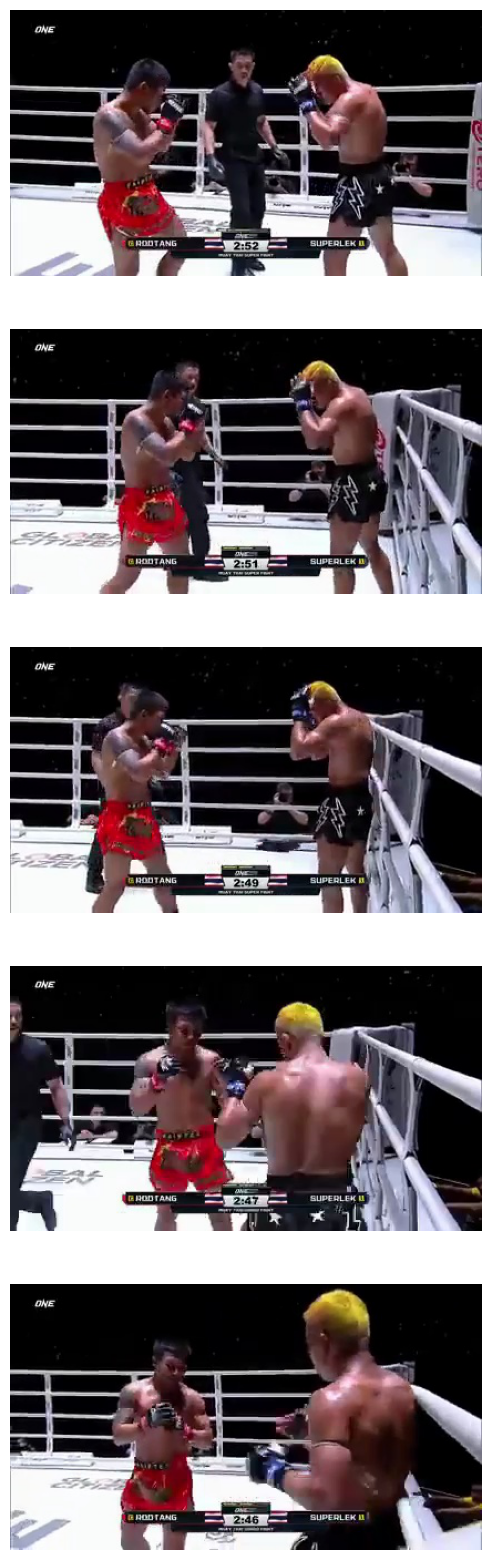

In [12]:
plt.figure(figsize=(20, 20))
for i, s in enumerate(base64Frames[::50]):
    # Decode base64 string to binary data
    b = base64.b64decode(s)
    
    stream = io.BytesIO(b)
    im = Image.open(stream)
    
    # Display the image
    plt.subplot(len(base64Frames[::50]), 1, i + 1)
    plt.axis('off')
    plt.imshow(im)

In [13]:
messages = [
    {
        "role": "user",
        "content": [
            "These frames are from a video. What's happening in the video?",
            *map(lambda x: {"image": x}, base64Frames[::50]),
        ]
    }
]
messages

[{'role': 'user',
  'content': ["These frames are from a video. What's happening in the video?",
   {'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCADwAaoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD+f+iiigAop7w7II5933ywx6Yx/jXu1z/wTE/b40u0i1LxH+yl430i0n0XV

In [14]:
response = client.chat.completions.create(
    model='gpt-4-turbo-2024-04-09',
    messages=messages,
)

In [15]:
response.choices[0].message.content

'The frames from the video are showing a Muay Thai fight between two fighters, identified as Rodtang and Superlek, based on the text displayed on the screen. The sequence captures a couple of seconds of the match where both fighters are actively engaging with each other, exchanging blows and movements, typical of a Muay Thai fight. The fighters are seen in defensive and attacking stances, using techniques characteristic of Muay Thai such as kicks, punches, elbow strikes, and knee strikes. A referee is present in the ring, overseeing the match to ensure rules are followed and to maintain the safety of the fighters. This sport is known for its intensity and combination of various striking and clinching techniques.'

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=eJQTuAHC1iIuxyNWhKpeiw&n=GPT-4+Video)